In [0]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from numpy import *
from pylab import *


## Dataset 1

local maxes: [ 3.6   5.1   6.75  7.2   9.9  15.15 20.25]


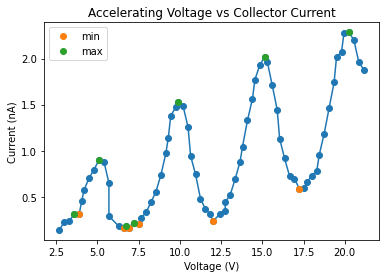

Distance Between Local Maxes:  [1.5, 1.65, 0.45, 2.7, 5.25, 5.1]
Mean of Distances:  2.78
Standart Derivation of Distances:  1.82


In [130]:
# Dataset:

Current = [ 0.14	, 0.23	, 0.235	, 0.315	, 0.31	, 0.455	, 0.575	, 0.705	, 0.795	, 0.9	, 0.88	, 0.65	, 0.29	, 0.18	, 0.16	, 0.185	, 0.165	, 0.22	, 0.205	, 0.27	, 0.33	, 0.44	, 0.555	, 0.735	, 0.97	, 1.14	, 1.38	, 1.47	, 1.53	, 1.48	, 1.255	, 0.945	, 0.745	, 0.48	, 0.365	, 0.31	, 0.235	, 0.315	, 0.34	, 0.44	, 0.52	, 0.69	, 0.88	, 1.045	, 1.33	, 1.56	, 1.77	, 1.93	, 2.02	, 1.965	, 1.71	, 1.445	, 1.13	, 0.915	, 0.725	, 0.695	, 0.585	, 0.6	, 0.655	, 0.73	, 0.78	, 0.955	, 1.185	, 1.465	, 1.74	, 2.02	, 2.07	, 2.28	, 2.285	, 2.2	, 1.96	, 1.88	]
Voltage = [2.7	, 3	, 3.3	, 3.6	, 3.9	, 4.05	, 4.2	, 4.5	, 4.8	, 5.1	, 5.4	, 5.7	, 5.7	, 6.3	, 6.6	, 6.75	, 6.9	, 7.2	, 7.5	, 7.65	, 7.95	, 8.25	, 8.55	, 8.85	, 9.15	, 9.3	, 9.45	, 9.75	, 9.9	, 10.2	, 10.5	, 10.65	, 10.95	, 11.25	, 11.55	, 11.85	, 12	, 12.45	, 12.75	, 12.75	, 13.05	, 13.35	, 13.65	, 13.8	, 14.1	, 14.4	, 14.55	, 14.85	, 15.15	, 15.3	, 15.6	, 15.9	, 16.05	, 16.35	, 16.65	, 16.95	, 17.25	, 17.55	, 17.7	, 18	, 18.3	, 18.45	, 18.75	, 19.05	, 19.35	, 19.5	, 19.8	, 19.95	, 20.25	, 20.55	, 20.85	, 21.15	]

xval = np.array(Voltage)
yval = np.array(Current)


# Calculating local maxes and local mins:
a = diff(sign(diff(yval))).nonzero()[0] + 1 # local min+max
b = (diff(sign(diff(yval))) > 0).nonzero()[0] + 1 # local min
c = (diff(sign(diff(yval))) < 0).nonzero()[0] + 1 # local max

print("local maxes:" , xval[c])
# Graphical output
plot(xval,yval)
plot(xval[b], yval[b], "o", label="min")
plot(xval[c], yval[c], "o", label="max")
plt.scatter( xval , yval )
plt.title( 'Accelerating Voltage vs Collector Current')
plt.xlabel('Voltage (V)')
plt.ylabel ( 'Current (nA)')
legend()
show()


# Calculating distance between local maxes: 
distance = []

for i in range(len(xval[c])):
  if i == len(xval[c])-1:
    break
  else:
    dis = xval[c][i+1] - xval[c][i]
    distance.append(round(dis,2))

print("Distance Between Local Maxes: ",distance)

# Calculating mean of distances: 
print("Mean of Distances: ",round(mean(distance),2))

# Calculating mean of distances: 
print("Standart Derivation of Distances: ", round(np.std(distance, dtype=np.float64),2))

dataset1Mean = round(mean(distance),2)

weightList = []
std = round(np.std(distance, dtype=np.float64),2)
weight = 1/(std*std)
weightList.append(weight)

valueMeanList = []
valueMeanList.append(round(mean(distance),2))


### Weighted Mean

In [139]:
meanList = [2.78, 3.9, 1.68, 2.1, 2.6, 1.79, 1.59, 2.47, 1.78, 3.34, 3.6, 2.73, 1.33, 1.88]
stdList = [1.82, 1.25, 1.54, 1.2, 1.54, 1.02, 1.16, 1.44, 1.64, 1.92, 1.91, 1.38, 0.95, 0.12]

weightList = []
for i in range(len(stdList)):
  weight = 1/(stdList[i]*stdList[i])
  weightList.append(round(weight,2))
print("weightedList:", weightList)

count = 0;
for j in range(len(meanList)):
  count = count + (weightList[j]*meanList[j])
print("count:", count)

totalWeight = 0;
for k in range(0, len(weightList)): 
    totalWeight = totalWeight + weightList[k] 
print("totalWeight", totalWeight)


weightedMean = count/totalWeight

print("Weighted Mean:",round(weightedMean,2))

weightedList: [0.3, 0.64, 0.42, 0.69, 0.42, 0.96, 0.74, 0.48, 0.37, 0.27, 0.27, 0.53, 1.11, 69.44]
count: 146.65999999999997
totalWeight 76.64
Weighted Mean: 1.91


### Error

In [140]:
Error = (4.98 - weightedMean)/weightedMean
print(round(Error,2))

1.6
